# TensorFlow

The use of Tensorflow, TensorFlow Life to create mobile apps on Android and iOS, Tensorflow JS to make them run in web browsers.

## Part 1.
## Fahrenheit - Celsius problem with ML

The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

𝑓=𝑐×1.8+32 

Of course, it would be simple enough to create a conventional Python function that directly performs this calculation, but that wouldn't be machine learning.

Instead, we will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100). Then, we will train a model that figures out the above formula through the training process.

In [23]:
import numpy as np
import tensorflow as tf
import pydot
import matplotlib.pyplot as plt

In [2]:
# create 2 arrays: input and output data
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


### Create a model 

We'll call the layer <b>'layer_0'</b> and create it by instantiating <b>tf.keras.layers.Dense</b> (regular densely-connected NN layer) with the following configuration:

<b>input_shape=[1]</b> — This specifies that the input to this layer is a single value. The single value is a floating point number, representing degrees Celsius.

<b>units=1</b> — This specifies the number of neurons in the layer. Suppose, this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit.

<b>activation</b> - Activation function to use. If you don't specify anything, no activation is applied

In [5]:
layer_0 = tf.keras.layers.Dense(units=1, input_shape=[1])  

In [6]:
print(layer_0)

In [7]:
# Build Sequential model with a single layer: layer_0
model = tf.keras.Sequential([layer_0])

Instructions for updating:
Colocations handled automatically by placer.


### Compile the model


Secon step is to compile model with one layer, we use:

<b>loss function</b> - mean squared error

<b>optimizer</b> - Adam with learning rate = 0.1

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Instructions for updating:
Use tf.cast instead.


### Train the model

input - celsius_q

output - fahrenheit_a

number of epochs - 500

In [9]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Instructions for updating:
Use tf.cast instead.
Finished training the model


In [26]:
print(dir(history))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_tf_api_names', '_tf_api_names_v1', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_train_batch_begin', 'on_train_batch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']


### Display training statistics

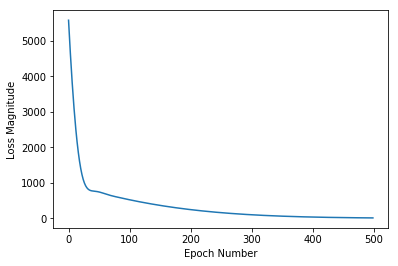

In [12]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [37]:
print("These are the layer variables: {}".format(layer_0.get_weights()))

These are the layer variables: [array([[1.8260205]], dtype=float32), array([28.69529], dtype=float32)]


### Predict with the model

In [35]:
print(model.predict([100.0]))

[[211.29733]]
